In [8]:
from brian2 import *
%matplotlib inline

# fn's defining the gradients given a certain tuple of values
def get_delta_v(vt, ut, I):
    return 0.04*vt**2+5.*vt+140.-ut+I

def get_delta_u(a, b, vt, ut):
    return a*(b*vt - ut)

In [30]:
def generate_plot_and_print_spike_num_for_b_value(a, b, I):
    # init. values
    v = -65; u = 0;
    # constants
    c = -65; d = 8;
    # time-step used in numerical integration
    dt = 0.005;
    
    v_vals = []; u_vals = []; timesteps = []
    n_steps = 200000
    spike_count = 0
    for i in range(0, n_steps):
        dv = get_delta_v(v, u, I)
        du = get_delta_u(a, b, v, u)
        v += dv * dt
        u += du * dt
        if(v>=30):
            spike_count += 1
            v = c
            u = u + d
        v_vals += [v]
        u_vals += [u]
        timesteps += [i*dt]


    # plotting
    tot_time = n_steps * dt
    n_bins = 10
    axline_step = tot_time / n_bins
    figure(figsize=(11, 6))
    for l in range(n_bins+1):
        axvline(l*axline_step, ls='--', c='k')
    axhline(30, ls='-', c='lightgray', lw=3)
    plot(timesteps, v_vals, '-', label='v')
    plot(timesteps, u_vals, '-', label='u')
    xlabel('Time (ms)')
    ylabel('v (mV)')
    title('Plot for constant parametrisation, with a='+"{:5.4f}".format(a)+
          ', b='+"{:4.3f}".format(b)+', I='+"{:3.2f}".format(I)+
          '. Oscillating at '+str(spike_count)+' Hz');

    print("last v:", v)
    print("last u:", u)
    print("spike_count: ", spike_count)
    print()
    return spike_count

current b-value: 0.2
last v: -70.00000000000986
last u: -13.999999999995515
spike_count:  0

current b-value: 0.21500000000000002
last v: -68.61790494527064
last u: -14.752849563226736
spike_count:  0

current b-value: 0.23000000000000004
last v: -67.05067337015286
last u: -15.421654875128702
spike_count:  0

current b-value: 0.24500000000000005
last v: -65.16606057401836
last u: -15.965684840628045
spike_count:  0

current b-value: 0.26000000000000006
last v: -62.50000545836495
last u: -16.250000253263348
spike_count:  0

current b-value: 0.2750000000000001
last v: -68.5500548503653
last u: -15.007512279884306
spike_count:  13

current b-value: 0.2900000000000001
last v: -53.912830011154405
last u: -16.80434736282731
spike_count:  16

current b-value: 0.3050000000000001
last v: -74.72812655662905
last u: -9.671561400640815
spike_count:  20

current b-value: 0.3200000000000001
last v: -44.67130285868567
last u: -17.19883782473043
spike_count:  22

current b-value: 0.33500000000000013
l

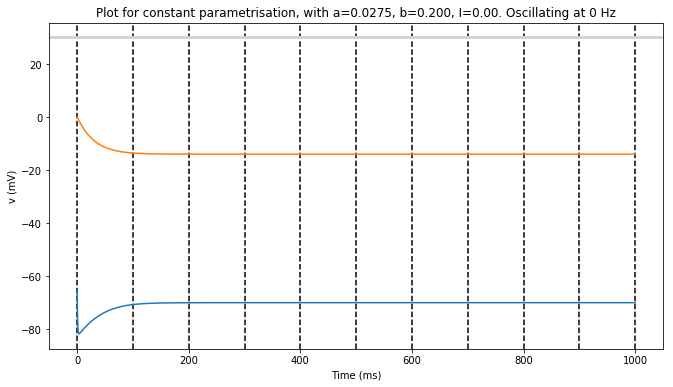

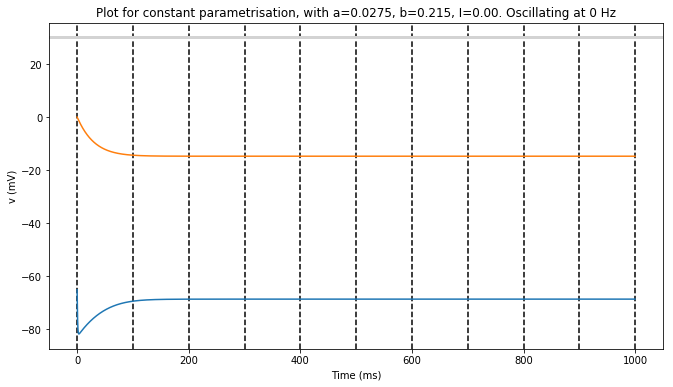

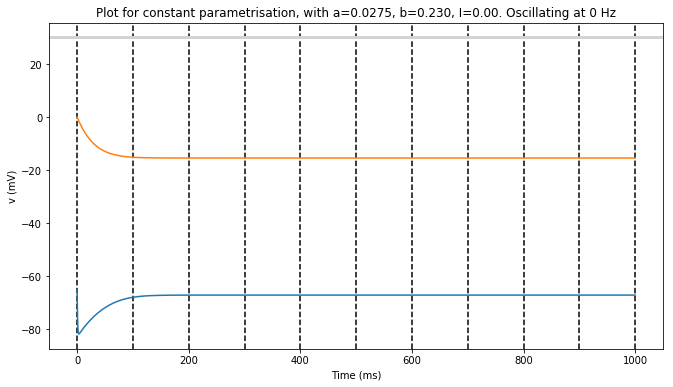

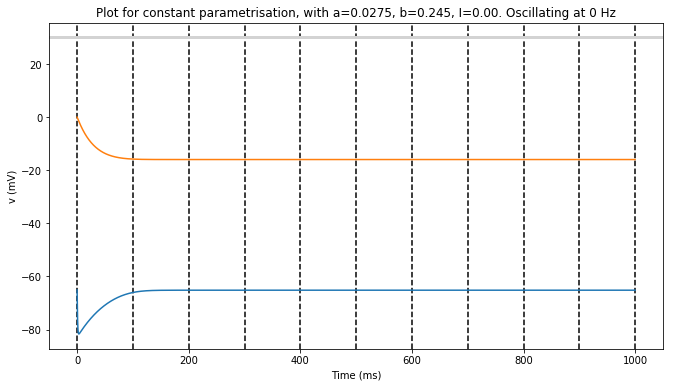

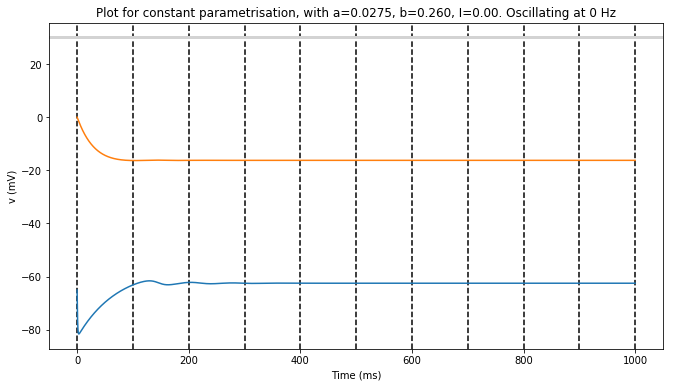

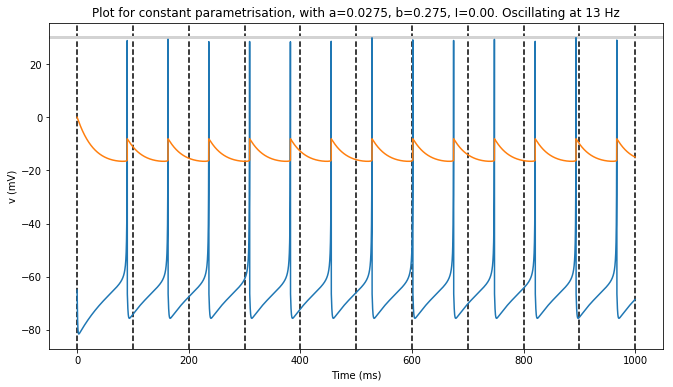

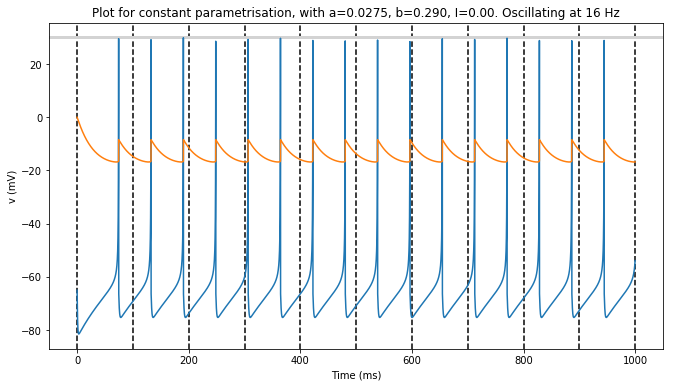

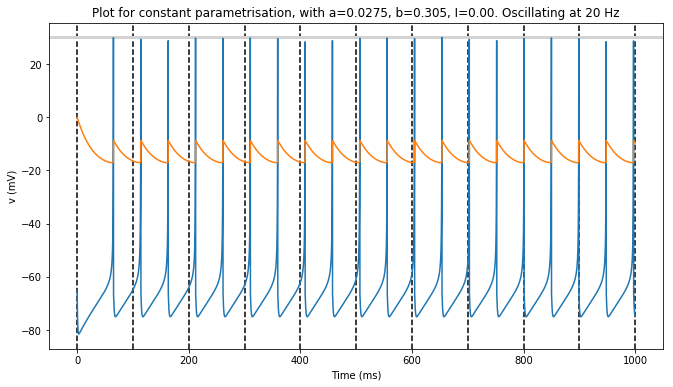

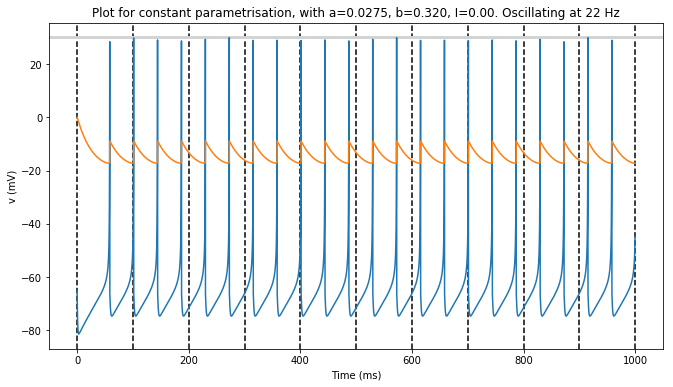

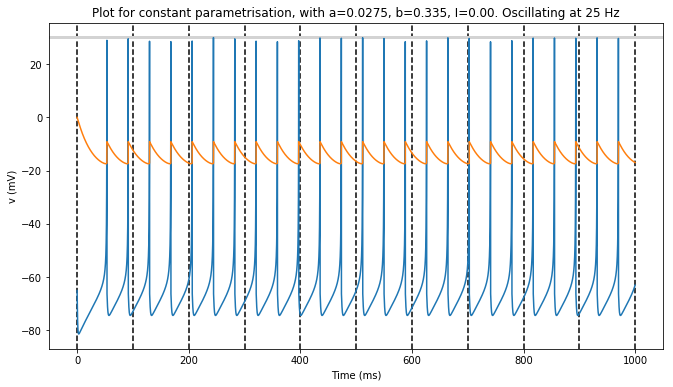

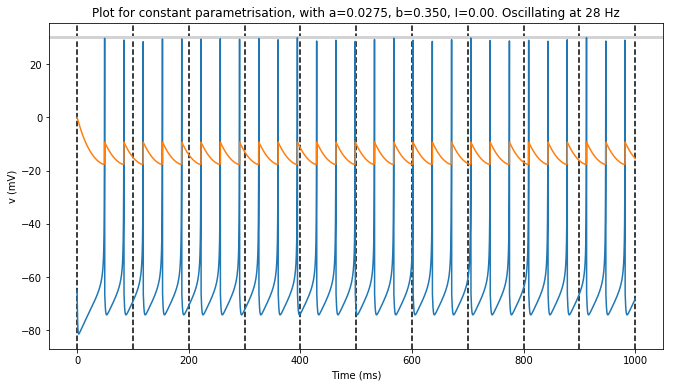

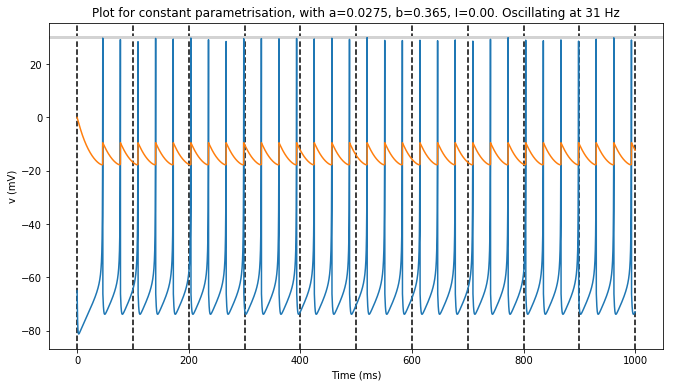

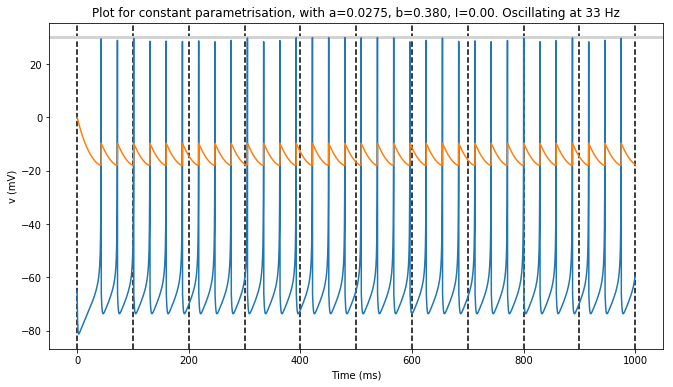

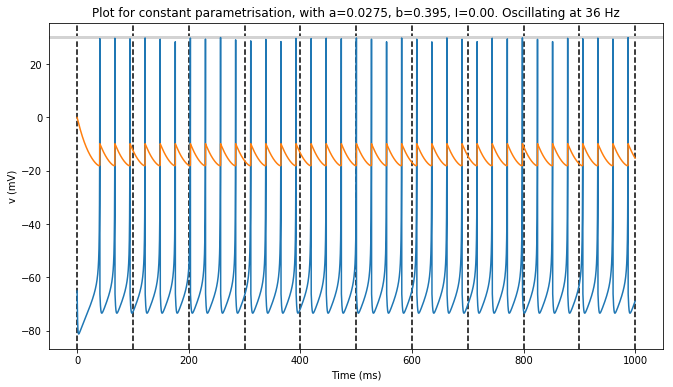

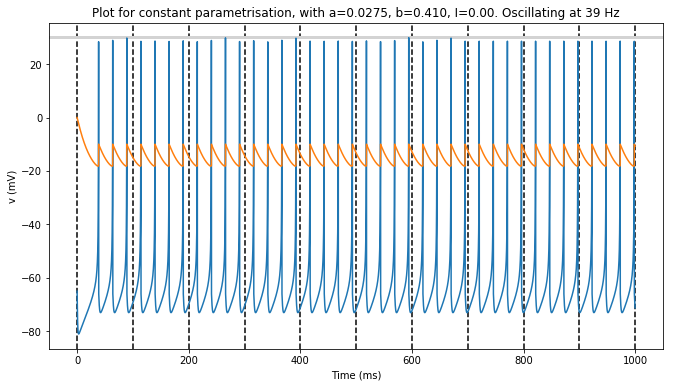

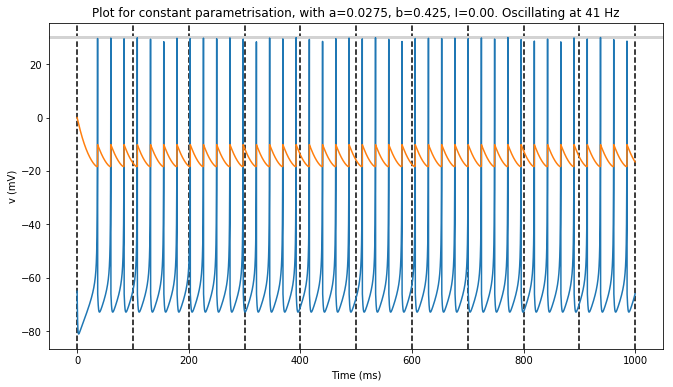

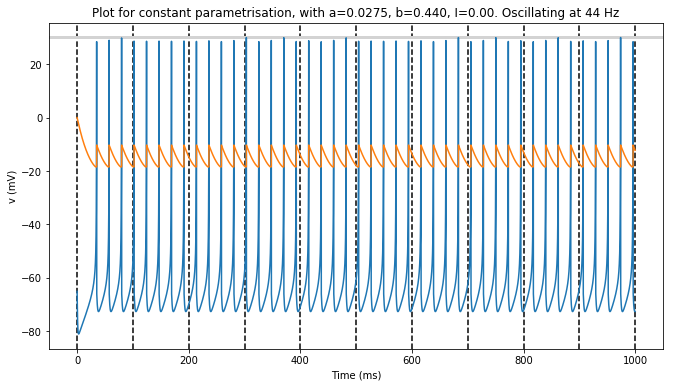

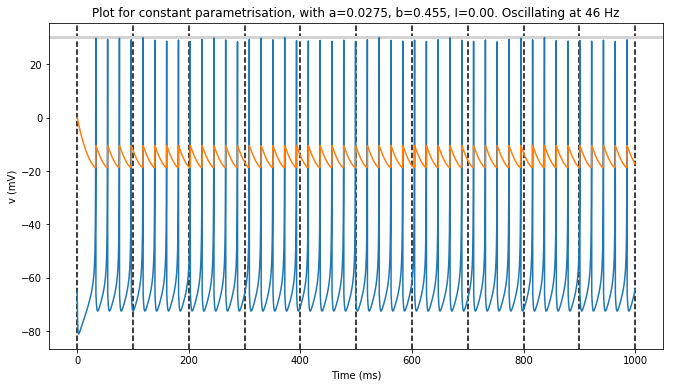

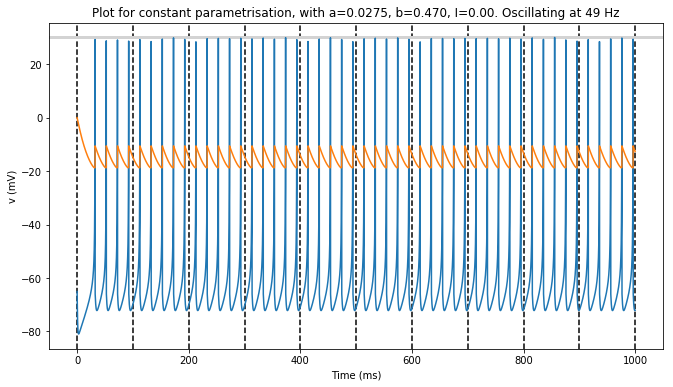

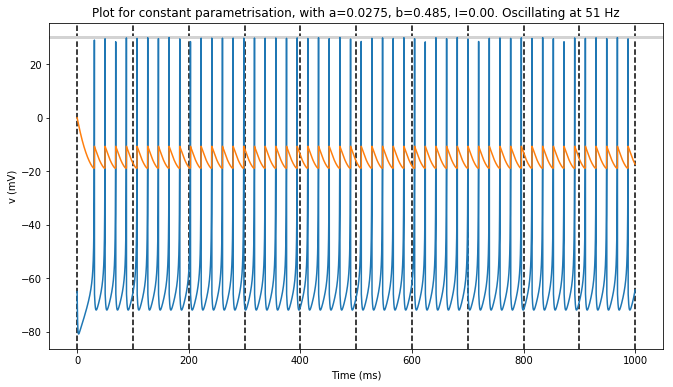

In [31]:
spike_counts = []
a = 0.0275
b = 0.2
I = 0
delta_b = 0.015
for t in range(0, 20):
    print("current b-value:", b)
    spike_counts += [generate_plot_and_print_spike_num_for_b_value(a, b, I)]
    b += delta_b

current b-value: 0.2
last v: -70.00004461020772
last u: -13.999973831995469
spike_count:  0

current b-value: 0.21500000000000002
last v: -68.61792688407718
last u: -14.75283914435263
spike_count:  0

current b-value: 0.23000000000000004
last v: -67.05067875304493
last u: -15.421653004927032
spike_count:  0

current b-value: 0.24500000000000005
last v: -65.16606064423173
last u: -15.965684827257071
spike_count:  0

current b-value: 0.26000000000000006
last v: -62.522342549644684
last u: -16.249542848364676
spike_count:  0

current b-value: 0.2750000000000001
last v: -67.71093333341125
last u: -15.245061567721809
spike_count:  5

current b-value: 0.2900000000000001
last v: -72.80554816368578
last u: -8.609011823867439
spike_count:  7

current b-value: 0.3050000000000001
last v: -71.96338503513819
last u: -12.78898019135028
spike_count:  8

current b-value: 0.3200000000000001
last v: -68.83553076780406
last u: -14.785901916341965
spike_count:  9

current b-value: 0.33500000000000013
last

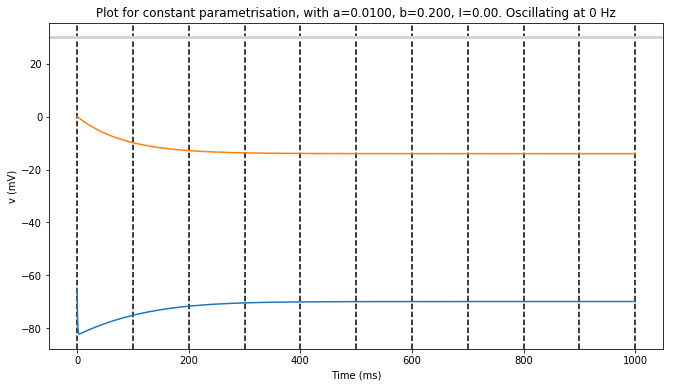

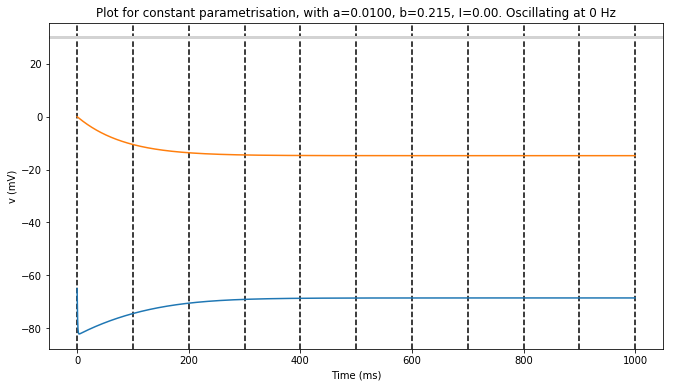

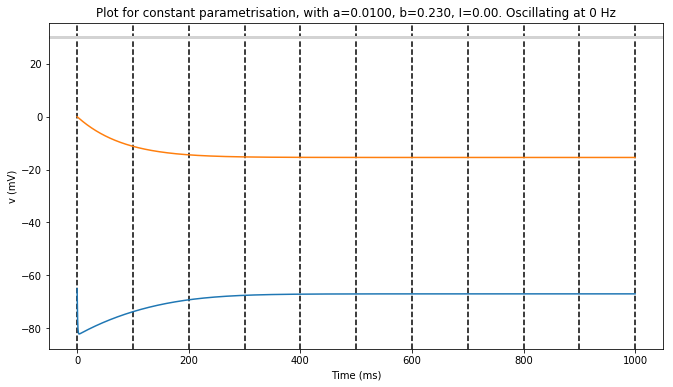

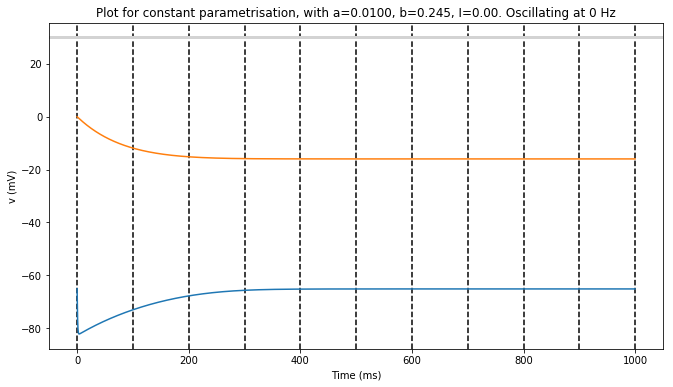

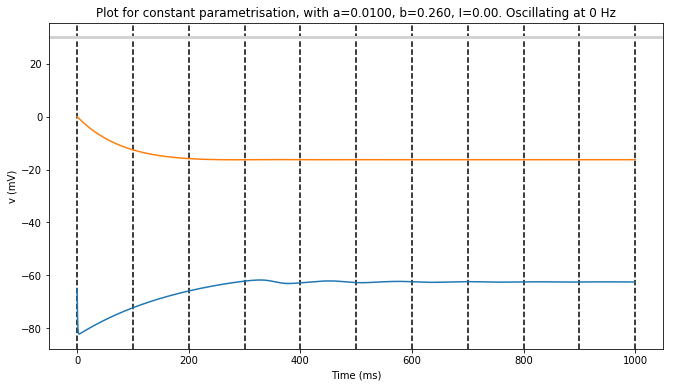

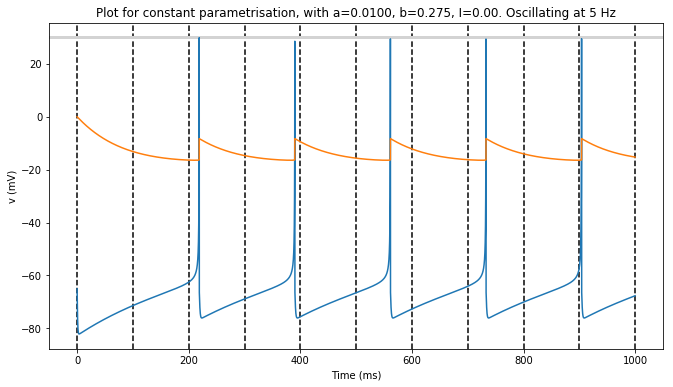

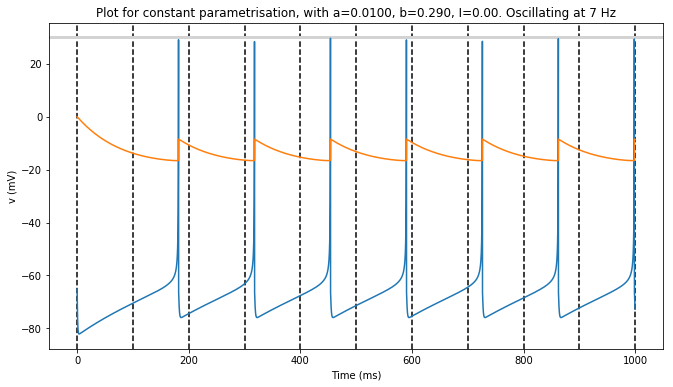

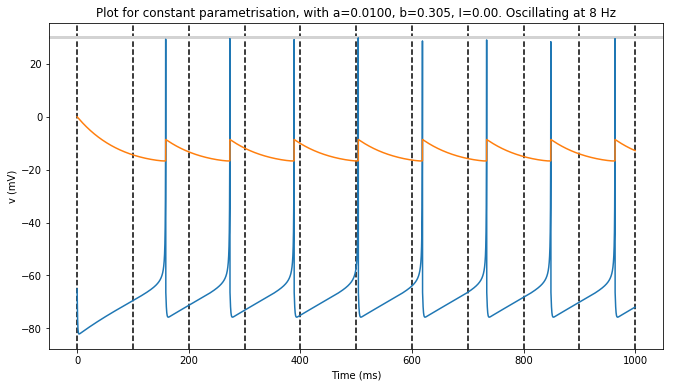

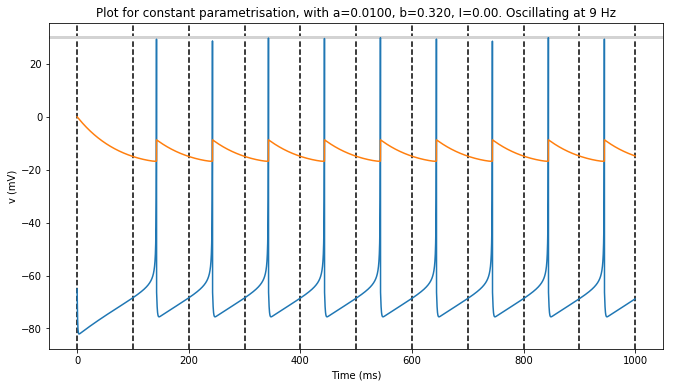

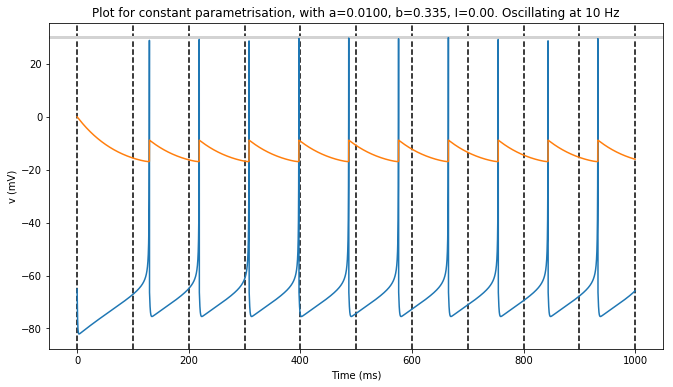

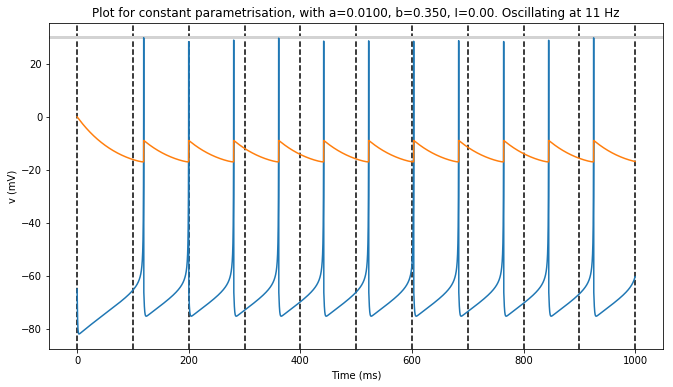

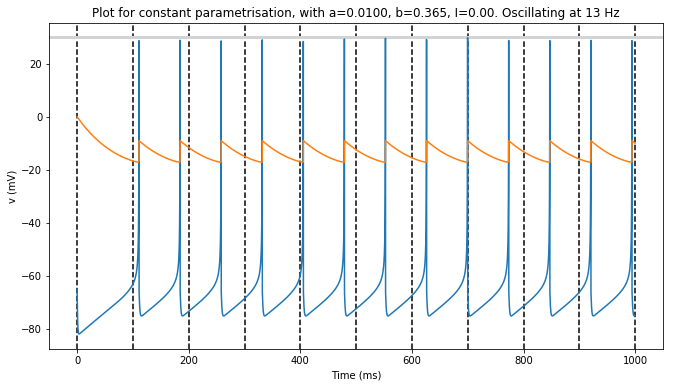

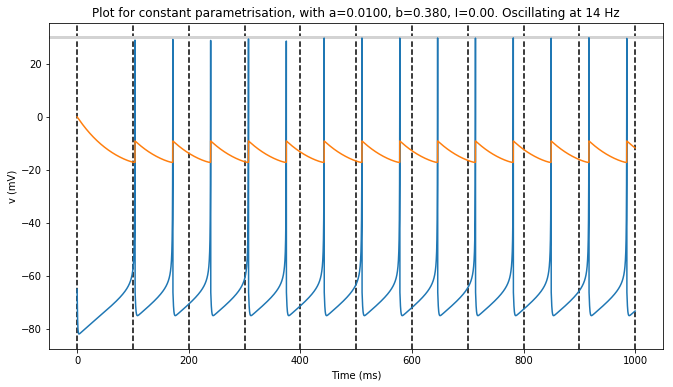

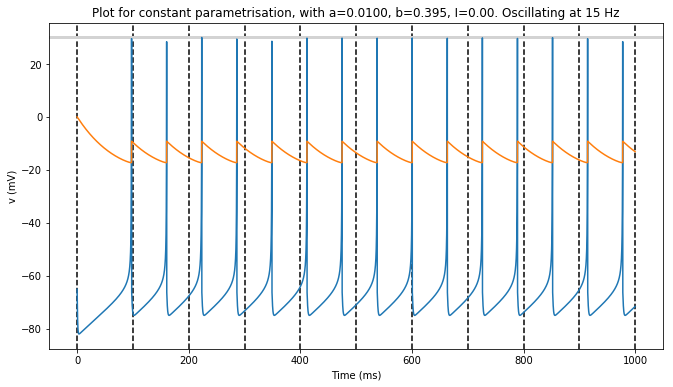

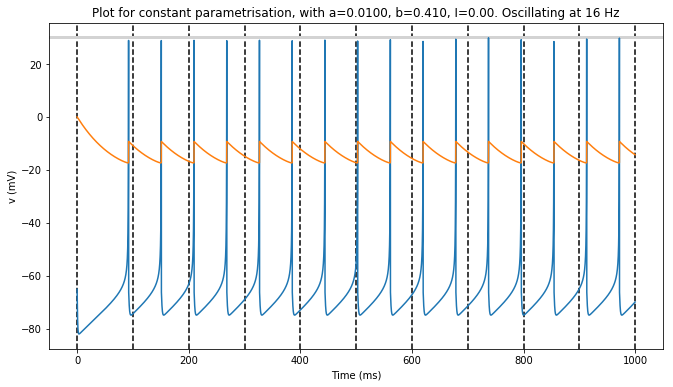

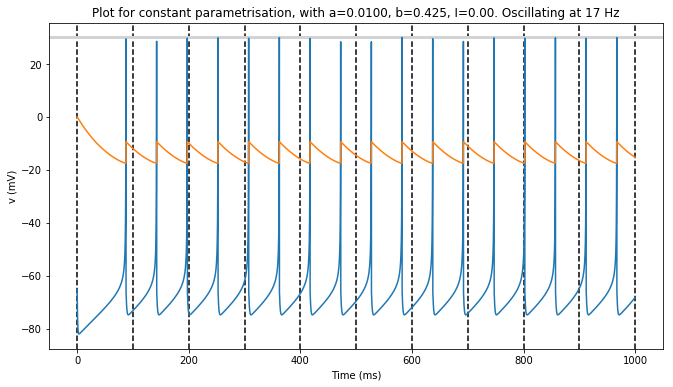

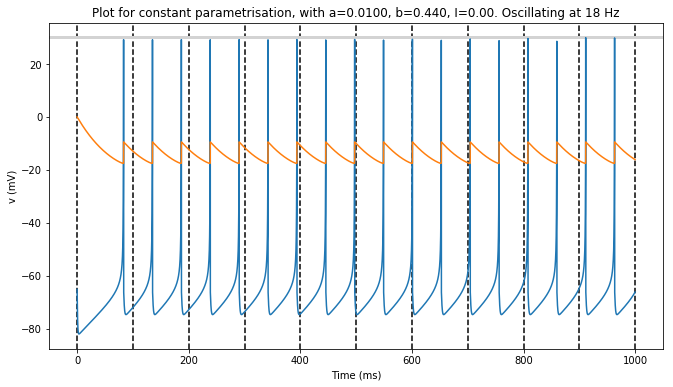

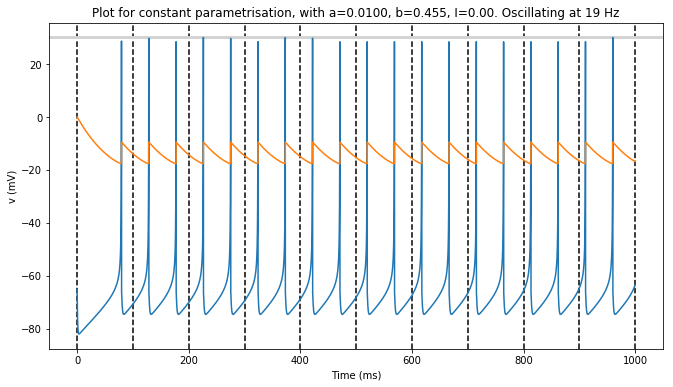

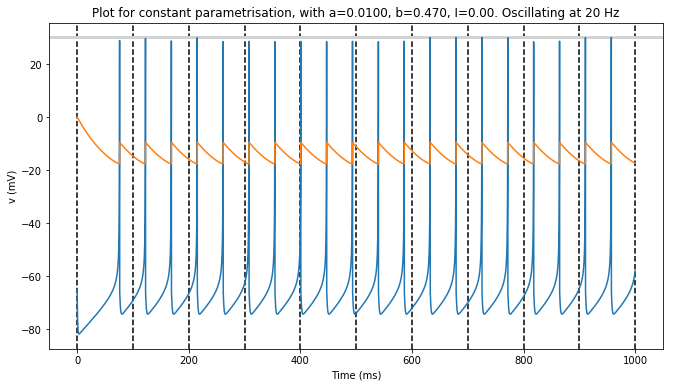

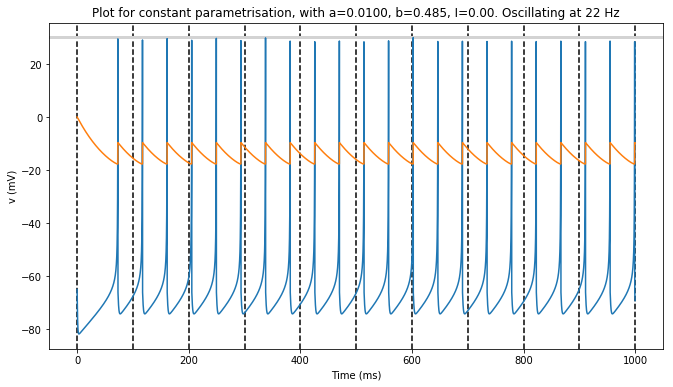

In [32]:
spike_counts = []
a = 0.01
b = 0.2
I = 0
delta_b = 0.015
for t in range(0, 20):
    print("current b-value:", b)
    spike_counts += [generate_plot_and_print_spike_num_for_b_value(a, b, I)]
    b += delta_b

current b-value: 0.24
last v: -65.76498204308663
last u: -15.783595690334332
spike_count:  0

current b-value: 0.25
last v: -64.31368656625406
last u: -16.078421641576433
spike_count:  0

current b-value: 0.26
last v: -62.34135496321961
last u: -16.208736835937966
spike_count:  0

current b-value: 0.27
last v: -71.93672561156583
last u: -12.889647750046576
spike_count:  12



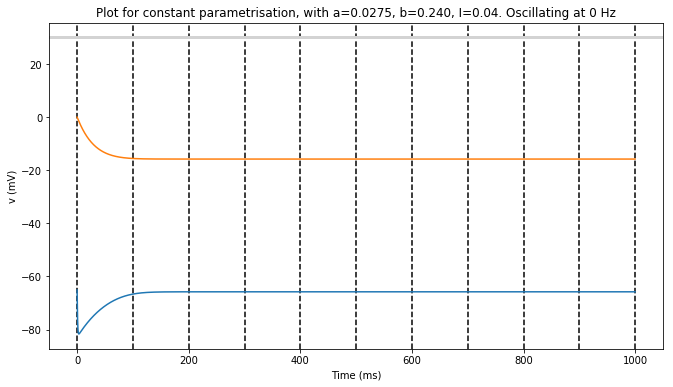

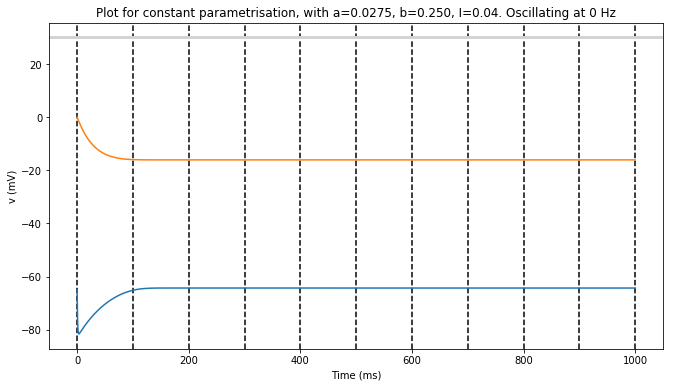

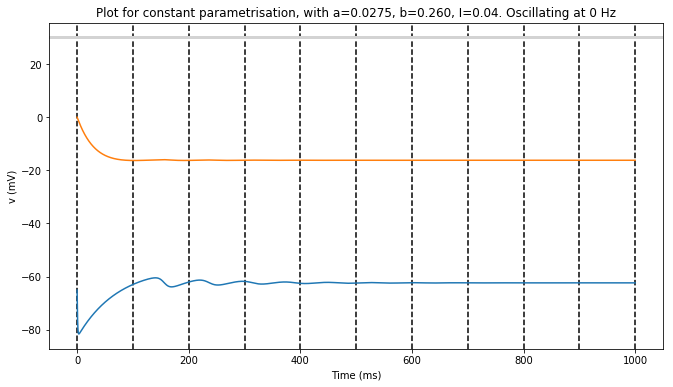

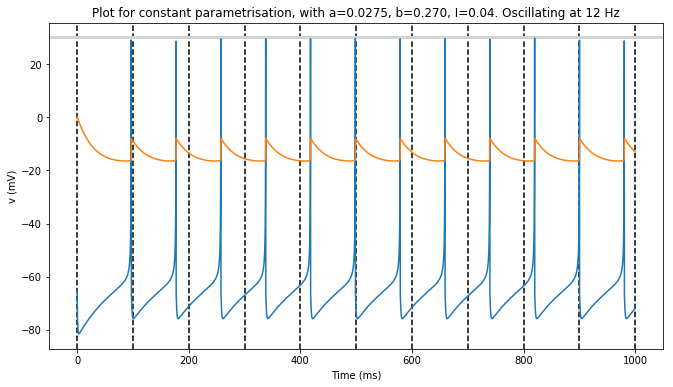

In [36]:
spike_counts = []
a = 0.0275
b = 0.24
I = 0.04
delta_b = 0.01
for t in range(0, 4):
    print("current b-value:", b)
    spike_counts += [generate_plot_and_print_spike_num_for_b_value(a, b, I)]
    b += delta_b

current b-value: 0.24
last v: -65.74499799841414
last u: -15.778799519612953
spike_count:  0

current b-value: 0.25
last v: -64.28831100173097
last u: -16.072077750442077
spike_count:  0

current b-value: 0.26
last v: -66.1827251022998
last u: -15.795688750126645
spike_count:  7

current b-value: 0.27
last v: -71.09401958137417
last u: -13.478186556101122
spike_count:  12



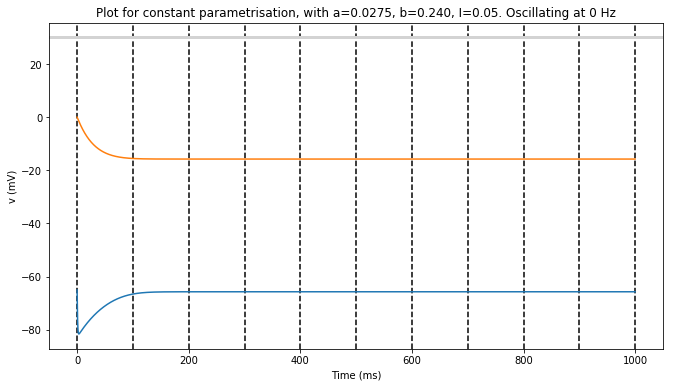

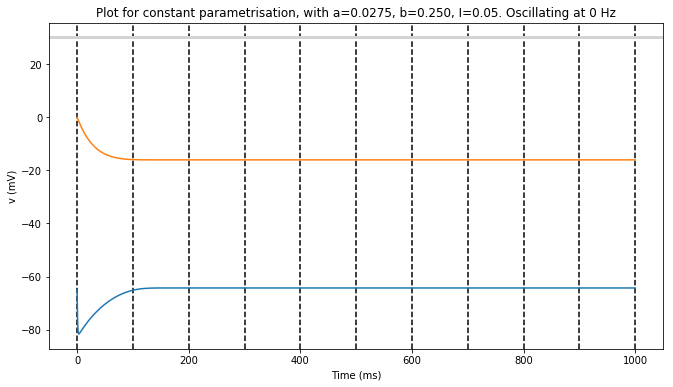

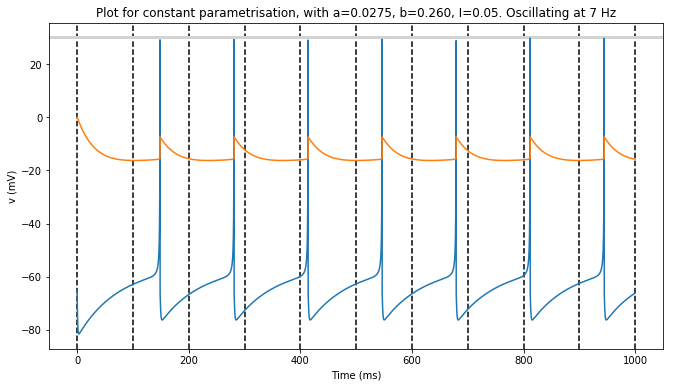

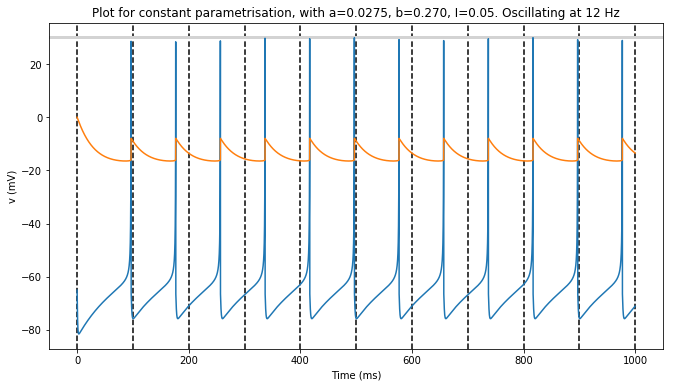

In [37]:
spike_counts = []
a = 0.0275
b = 0.24
I = 0.05
delta_b = 0.01
for t in range(0, 4):
    print("current b-value:", b)
    spike_counts += [generate_plot_and_print_spike_num_for_b_value(a, b, I)]
    b += delta_b

In [228]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
